In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

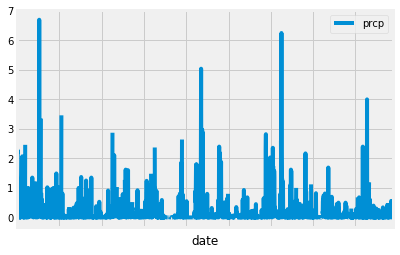

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
max_date = session.query(func.max(Measurement.date)).all()
max_date = dt.datetime.strptime(max_date[0][0],'%Y-%m-%d')

# Calculate the date 1 year ago from the last data point in the database
min_date = dt.date(max_date.year - 1, max_date.month, max_date.day + 1)

# Perform a query to retrieve the data and precipitation scores
query1 = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= min_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_q1 = pd.DataFrame(query1)
df_q1.index = df_q1["date"]
df_q1.rename(columns={'date': 'date_c'}, inplace=True)
# Sort the dataframe by date
df_q1 = df_q1.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df_q1.plot()
plt.legend(loc='best')
plt.xlabel("date")
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_q1.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
unique_station = session.query(Measurement.station).distinct().all()

print(str(len(unique_station))+" unique stations from the measurement table")


9 unique stations from the measurement table


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query2 = session.query(Measurement.station, 
              func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for i in query2:
    print(i)

print("\nmost active station: "+ str(query2[0][0]))


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)

most active station: USC00519281


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
query3 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == query2[0][0]).all()
query3

[(54.0, 85.0, 71.66378066378067)]

station with the highest number of temperature observations: USC00519281



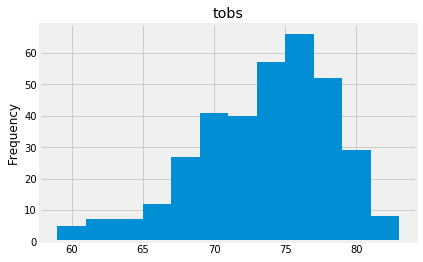

In [26]:
# Choose the station with the highest number of temperature observations.
query4 = session.query(Measurement.station,
                       func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print("station with the highest number of temperature observations: "+ str(query4[0][0])+"\n")

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query5 = session.query(Measurement.tobs).filter(Measurement.date >= min_date).filter(Measurement.station == query4[0][0]).all()
df_q5 = pd.DataFrame(query5)
df_q5.hist(bins = 12)
plt.ylabel("Frequency")
plt.show()